# Data Analysis

This notebook explores the housing dataset and trains models to predict the median house value.

In [4]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  

- read CSV file into a pandas DataFrame named 'data'

In [ ]:
data = pd.read_csv('housing.csv')  

In [6]:
data  # display the DataFrame to inspect the first and last rows (Jupyter will render this)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [7]:
data.info()  # show summary info: index dtype, columns, non-null counts, and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- remove any rows with missing values in-place to simplify analysis

In [ ]:
data.dropna(inplace=True)  

In [9]:
data.info()  # re-run info() to confirm missing values were dropped and counts updated

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


# Data Exploration

Explore distributions, correlations, and visual patterns to understand the data.

In [ ]:
from sklearn.model_selection import train_test_split  # import function to split data into train/test sets
X = data.drop('median_house_value', axis=1)           # features: all columns except the target
y = data['median_house_value']                        # target variable: the median house value to predict

- split data: 80% train, 20% test, fixed seed for reproducibility

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

- combine training features and target into a single DataFrame for exploration

In [ ]:
train_data = X_train.join(y_train)  

- display the combined training DataFrame to inspect its contents

In [13]:
train_data  

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,<1H OCEAN,227600.0
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,INLAND,110400.0
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,INLAND,248100.0
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,<1H OCEAN,305600.0
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,NEAR OCEAN,214600.0
...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,2991.0,500.0,1437.0,453.0,5.4286,<1H OCEAN,273400.0
12081,-117.54,33.76,5.0,5846.0,1035.0,3258.0,1001.0,4.7965,<1H OCEAN,160800.0
5447,-118.42,34.01,42.0,1594.0,369.0,952.0,362.0,3.0990,<1H OCEAN,335400.0
866,-122.04,37.57,12.0,5719.0,1064.0,3436.0,1057.0,5.2879,NEAR BAY,231200.0


- plot histograms for all numeric columns to inspect distributions

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

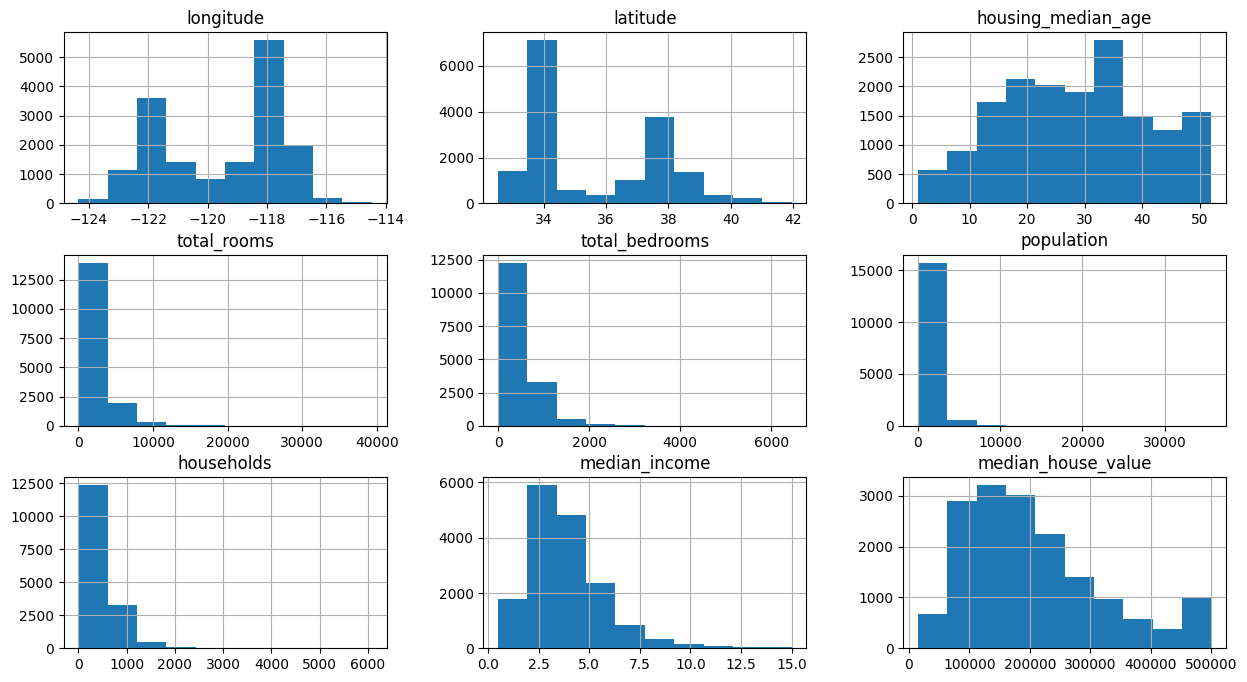

In [14]:
train_data.hist(figsize=(15, 8))  

- correlation heatmap for numeric features (annotate values)

<Axes: >

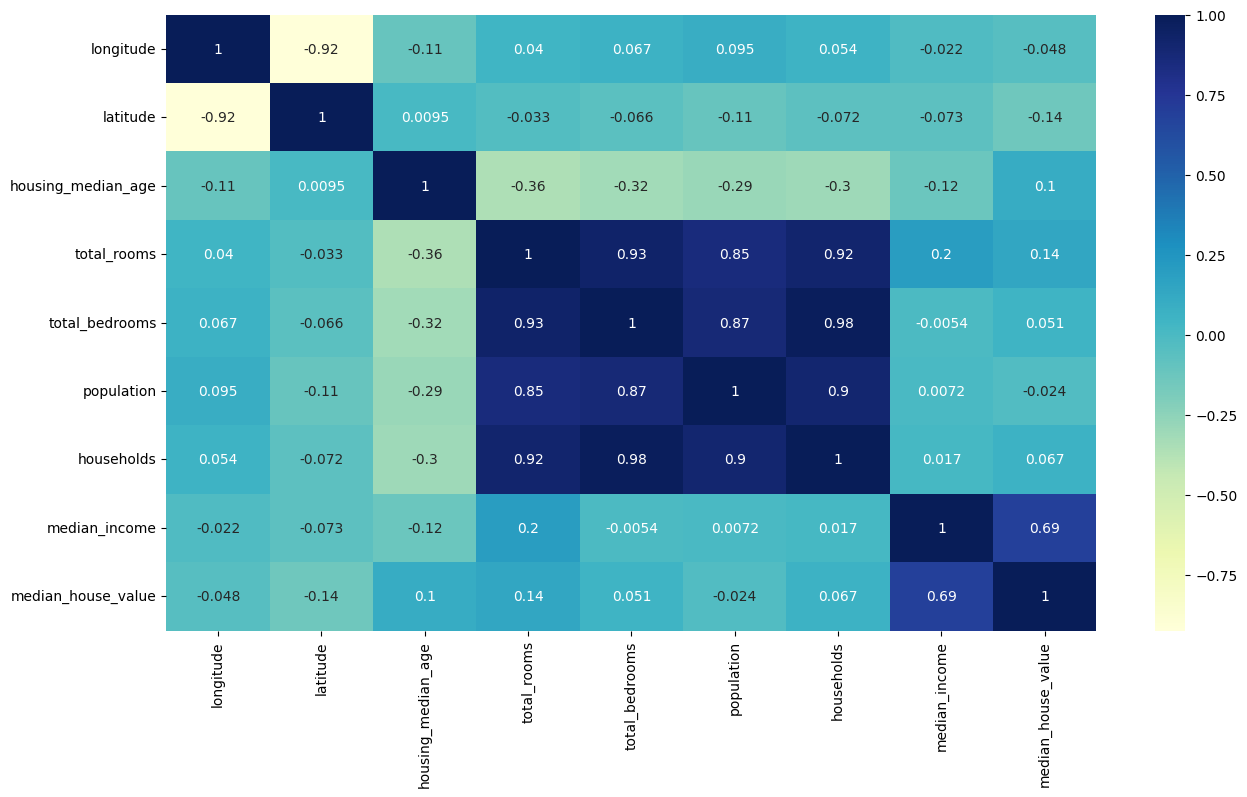

In [15]:
plt.figure(figsize=(15, 8))  # create a new figure with specified size for the heatmap
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")  

# Data Preprocessing

Clean and transform features (handle missing values, encode categories, and apply transforms).

In [ ]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)        # apply log transform to reduce skew for total_rooms
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)  # log transform total_bedrooms
train_data['population'] = np.log(train_data['population'] + 1)          # log transform population
train_data['households'] = np.log(train_data['households'] + 1)          # log transform households

- re-plot histograms to check distributions after transformations

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

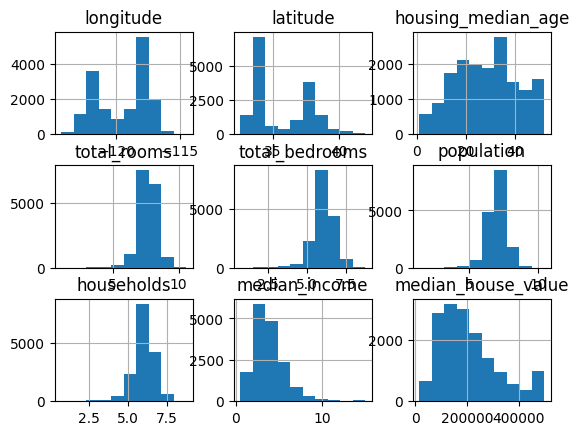

In [17]:
train_data.hist()  

- inspect counts of categorical 'ocean_proximity' values

In [18]:
train_data.ocean_proximity.value_counts()  

ocean_proximity
<1H OCEAN     7231
INLAND        5156
NEAR OCEAN    2114
NEAR BAY      1842
ISLAND           3
Name: count, dtype: int64

- one-hot encode 'ocean_proximity' and drop original column

In [ ]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)  

- display DataFrame after encoding to verify new dummy columns

In [20]:
train_data  

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17727,-121.80,37.32,14.0,8.392310,6.829794,7.900637,6.793466,4.7027,227600.0,True,False,False,False,False
2057,-119.63,36.64,33.0,6.944087,5.204007,6.431331,5.164786,3.4107,110400.0,False,True,False,False,False
6453,-118.06,34.12,25.0,8.266678,6.744059,7.522400,6.633318,3.6639,248100.0,False,True,False,False,False
4619,-118.31,34.07,28.0,7.767687,6.856462,7.922986,6.796824,2.2364,305600.0,True,False,False,False,False
15266,-117.27,33.04,27.0,7.517521,5.973810,7.172425,6.003887,3.5500,214600.0,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,8.003697,6.216606,7.271009,6.118097,5.4286,273400.0,True,False,False,False,False
12081,-117.54,33.76,5.0,8.673684,6.943122,8.089176,6.909753,4.7965,160800.0,True,False,False,False,False
5447,-118.42,34.01,42.0,7.374629,5.913503,6.859615,5.894403,3.0990,335400.0,True,False,False,False,False
866,-122.04,37.57,12.0,8.651724,6.970730,8.142354,6.964136,5.2879,231200.0,False,False,False,True,False


-  correlation matrix after preprocessing

<Axes: >

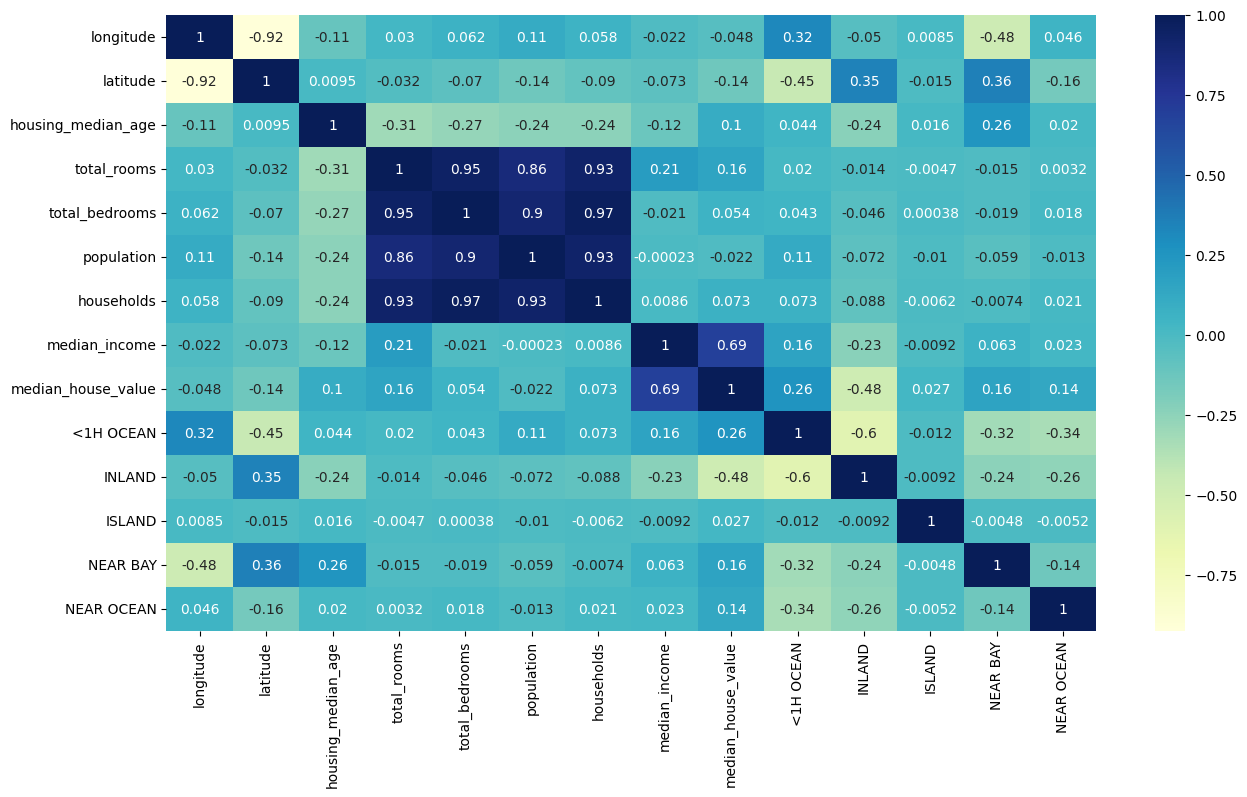

In [21]:
plt.figure(figsize=(15, 8))  # new figure for updated correlation heatmap
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu") 

- scatterplot of locations

<Axes: xlabel='longitude', ylabel='latitude'>

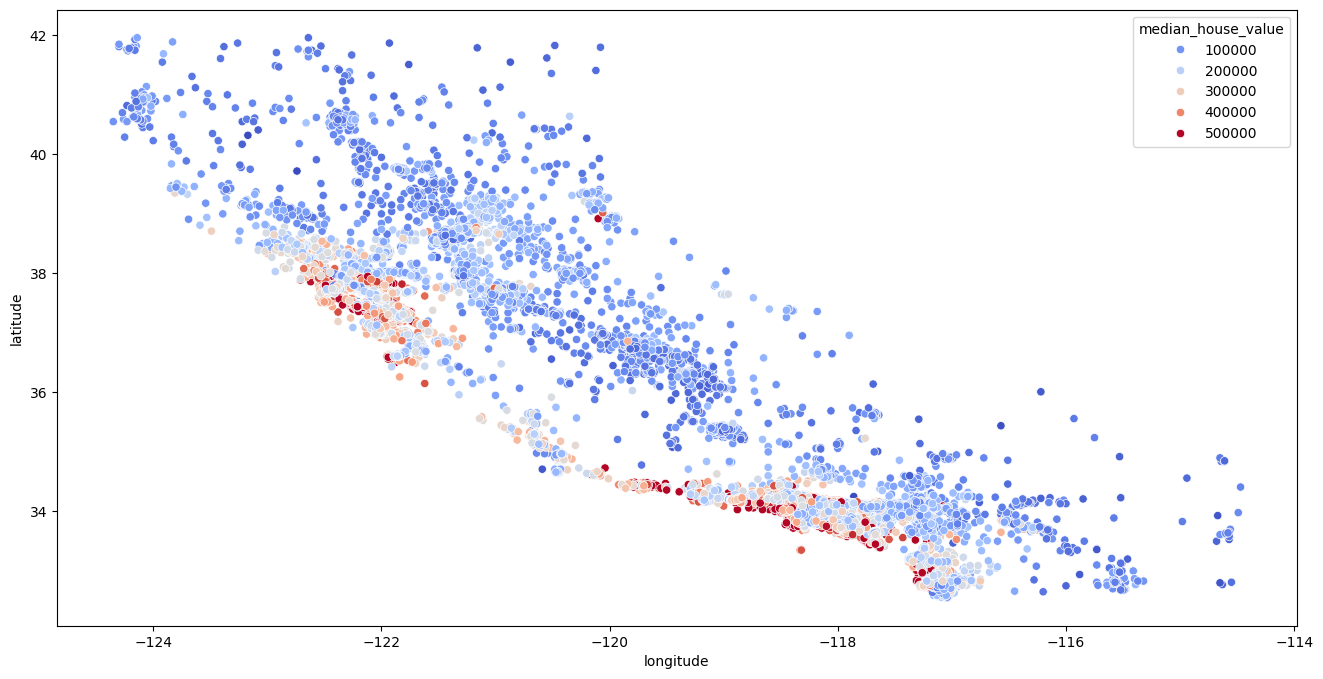

In [22]:
plt.figure(figsize=(16, 8))  # create a larger figure for spatial scatter
sns.scatterplot(x="longitude", y="latitude", data=train_data, hue="median_house_value", palette="coolwarm")  # scatterplot of locations colored by house value

In [ ]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']  # create feature: proportion of bedrooms to rooms
train_data['household_rooms'] = train_data["total_rooms"] / train_data['households']    # create feature: rooms per household

- visualize correlations

<Axes: >

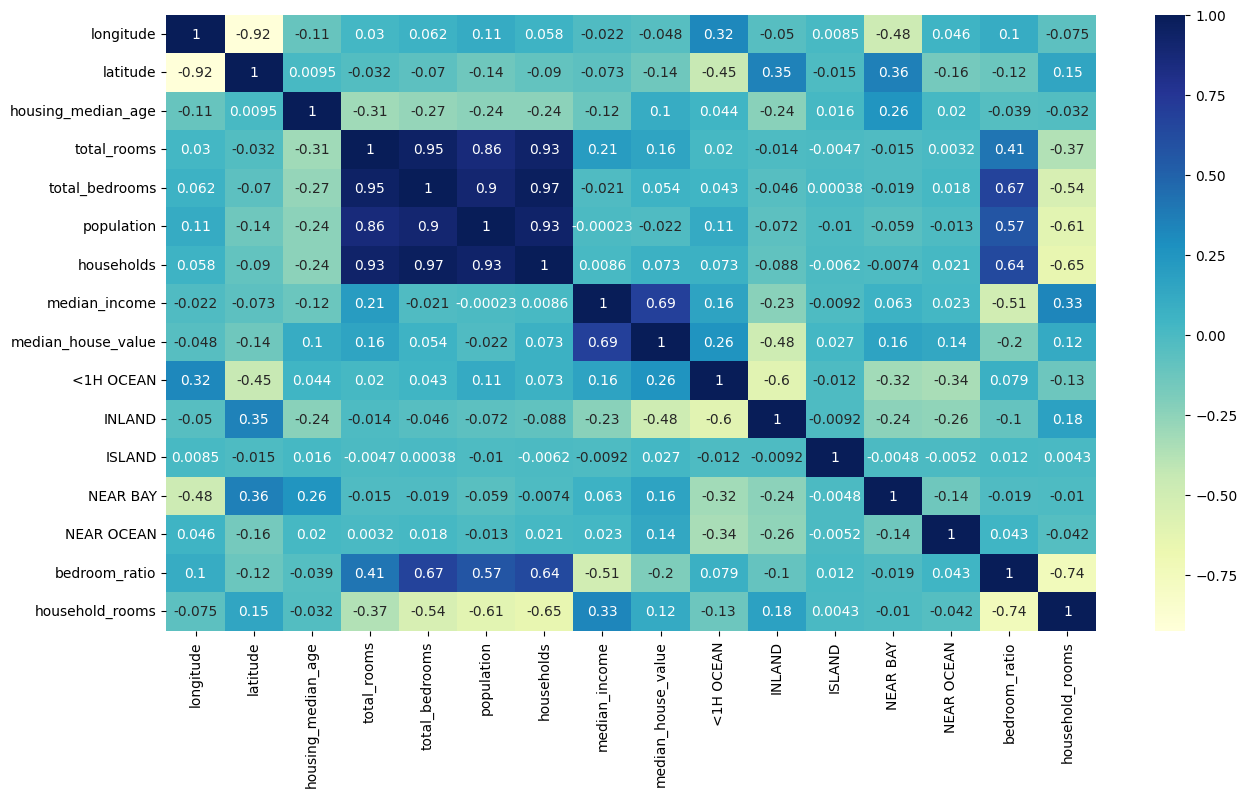

In [24]:
plt.figure(figsize=(15, 8))  # new figure for correlation heatmap including engineered features
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")  # visualize correlations to guide feature selection

# Linear Regression

Train and evaluate a linear regression model on scaled features.

In [25]:
from sklearn.linear_model import LinearRegression  # import linear regression model
from sklearn.preprocessing import StandardScaler   # import scaler for feature standardization

scaler = StandardScaler()  # instantiate a StandardScaler to normalize features for regression

X_train,y_train = train_data.drop(['median_house_value'], axis=1),train_data['median_house_value']  # split train_data into features (X_train) and target (y_train)

X_train_s = scaler.fit_transform(X_train)  # fit scaler to training features and transform them

reg = LinearRegression()  # create a LinearRegression model instance

reg.fit(X_train_s,y_train)  # train the linear regression model on the scaled training data

LinearRegression()

In [ ]:
test_data = X_test.join(y_test)  # combine X_test and y_test into a single DataFrame for preprocessing

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)        # apply same log transforms to test data total_rooms
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)  # log transform total_bedrooms in test set
test_data['population'] = np.log(test_data['population'] + 1)          # log transform population in test set
test_data['households'] = np.log(test_data['households'] + 1)          # log transform households in test set

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)  # one-hot encode ocean_proximity in test set and drop original

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']  # recreate bedroom_ratio feature for test data
test_data['household_rooms'] = test_data["total_rooms"] / test_data['households']    # recreate household_rooms feature for test data

- split test_data into features and target for evaluation

In [ ]:
X_test,y_test = test_data.drop(['median_house_value'], axis=1),test_data['median_house_value']  

- scale test features using the scaler fitted on the training data

In [ ]:
X_test_s = scaler.transform(X_test)  

- compute R^2 score of the linear regression model on the scaled test data

In [29]:
reg.score(X_test_s,y_test)  

0.6687407117584969

# Random Forest

Train and tune a Random Forest regressor and compare performance to linear regression.

- import random forest regressor for non-linear modeling
- instantiate a default RandomForestRegressor
- train the random forest using the scaled training features and target

In [30]:
from sklearn.ensemble import RandomForestRegressor  

forest = RandomForestRegressor()  

forest.fit(X_train_s, y_train)  

RandomForestRegressor()

- compute R^2 score of the trained random forest on the scaled test data

In [31]:
forest.score(X_test_s,y_test)  

0.8222328856162553

Hyperparameter tuning (GridSearchCV)
- Define `param_grid` for `n_estimators`, `min_samples_split`, `max_depth`
- Run `GridSearchCV` (5-fold CV) using `neg_mean_squared_error` to select best hyperparameters

In [33]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid ={
    "n_estimators":[10, 20, 30],
    "min_samples_split":[2 ,4],
    "max_depth":[None, 4, 8]
    
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)
grid_search.fit(X_train_s,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [10, 20, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')


- show the best estimator

In [34]:
grid_search.best_estimator_  

RandomForestRegressor(n_estimators=30)

-  evaluate the best estimator on the test set (R^2)

In [35]:
grid_search.best_estimator_.score(X_test_s,y_test)  

0.8151763224751584